<a href="https://colab.research.google.com/github/AE-H1ryu/BDAO-IMA/blob/main/Big_data_IMA_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "big-data-group4-422711"
dataset_name = "IMA_datatset"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,RK6-cJ9hj53RzOlCBmpT-g,Impasto,None,Tampa,FL,33611,27.890814,-82.502346,5.0,5,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
#Drop useless column
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_drop = restaurant_df.drop(['address' , 'city' , 'state', 'postal_code' , 'latitude' , 'longitude' , 'business_id', 'hours'], axis=1)
df_drop.head()

,name,stars,review_count,is_open,attributes,categories,category_AcaiBowls,category_Accessories,category_Accountants,category_ActiveLife,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,Hibachi Express,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants",0,0,0,0,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,Domino's Pizza,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants",0,0,0,0,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,Core de Roma,5.0,12,1,"{'RestaurantsTakeOut': 'None', 'RestaurantsDel...","Restaurants, Italian",0,0,0,0,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,Impasto,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Italian, Food Trucks, Food",0,0,0,0,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,Crafty Crab,2.5,14,1,"{'BusinessParking': ""{u'valet': False, u'garag...","Seafood, Restaurants",0,0,0,0,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
#display all
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
print(df_drop.columns.tolist())

['name', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'category_AcaiBowls', 'category_Accessories', 'category_Accountants', 'category_ActiveLife', 'category_Acupuncture', 'category_Adult', 'category_AdultEducation', 'category_AdultEntertainment', 'category_Advertising', 'category_Afghan', 'category_African', 'category_AirDuctCleaning', 'category_Airlines', 'category_AirportLounges', 'category_AirportShuttles', 'category_AirportTerminals', 'category_Airports', 'category_AmateurSportsTeams', 'category_American_New_', 'category_American_Traditional_', 'category_AmusementParks', 'category_AnimalShelters', 'category_Antiques', 'category_Apartments', 'category_Appliances', 'category_Appliances_Repair', 'category_Aquariums', 'category_Arabic', 'category_Arcades', 'category_Argentine', 'category_Armenian', 'category_ArtClasses', 'category_ArtGalleries', 'category_ArtMuseums', 'category_ArtTours', 'category_Arts_Crafts', 'category_Arts_Entertainment', 'category_AsianFusion', 

In [ ]:
df_drop_1 = df_drop.drop(['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BusinessParking', 'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi', 'Alcohol',
                              'Caters', 'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'GoodForKids', 'CoatCheck', 'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
                               'WheelchairAccessible', 'HasTV', 'HappyHour', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing', 'BestNights',
                               'BYOB', 'Corkage', 'Parking', 'attributes' , 'categories', 'name'], axis=1)
df_drop_1.head()

,stars,review_count,is_open,category_AcaiBowls,category_Accessories,category_Accountants,category_ActiveLife,category_Acupuncture,category_Adult,category_AdultEducation,category_AdultEntertainment,category_Advertising,category_Afghan,category_African,category_AirDuctCleaning,category_Airlines,category_AirportLounges,category_AirportShuttles,category_AirportTerminals,category_Airports,category_AmateurSportsTeams,category_American_New_,category_American_Traditional_,category_AmusementParks,category_AnimalShelters,category_Antiques,category_Apartments,category_Appliances,category_Appliances_Repair,category_Aquariums,category_Arabic,category_Arcades,category_Argentine,category_Armenian,category_ArtClasses,category_ArtGalleries,category_ArtMuseums,category_ArtTours,category_Arts_Crafts,category_Arts_Entertainment,category_AsianFusion,category_AuctionHouses,category_Audio_VisualEquipmentRental,category_Australian,category_Austrian,category_AutoCustomization,category_AutoDetailing,category_AutoGlassServices,category_AutoLoanProviders,category_AutoParts_Supplies,category_AutoRepair,category_Automotive,category_AxeThrowing,category_Bagels,category_Bakeries,category_Bangladeshi,category_Banks_CreditUnions,category_BarCrawl,category_Barbeque,category_Barbers,category_Bars,category_Bartenders,category_Basque,category_BatteryStores,category_BattingCages,category_BeachBars,category_Beaches,category_Beauty_Spas,category_Bed_Breakfast,category_Beer,category_BeerBar,category_BeerGardens,category_BeerHall,category_BeerTours,category_Belgian,category_BeverageStore,category_BikeRentals,category_BikeRepair_Maintenance,category_Bikes,category_BillingServices,category_Bistros,category_BlowDry_OutServices,category_BoatCharters,category_BoatRepair,category_BoatTours,category_Boating,category_BocceBall,category_BodyShops,category_Books,category_Bookstores,category_BotanicalGardens,category_Bowling,category_Brasseries,category_Brazilian,category_Breakfast_Brunch,category_Breweries,category_BrewingSupplies,category_Brewpubs,category_Bridal,category_British,category_BubbleTea,category_BuddhistTemples,category_Buffets,category_BuildingSupplies,category_Burgers,category_Burmese,category_BusTours,category_BusinessConsulting,category_BusinessLaw,category_Butcher,category_CSA,category_Cabaret,category_Cabinetry,category_Cafes,category_Cafeteria,category_Cajun_Creole,category_Calabrian,category_Cambodian,category_Canadian_New_,category_CandleStores,category_CandyStores,category_CannabisClinics,category_CannabisDispensaries,category_Cantonese,category_CarDealers,category_CarShareServices,category_CarStereoInstallation,category_CarWash,category_Cards_Stationery,category_Caribbean,category_CarpetCleaning,category_Casinos,category_Caterers,category_ChampagneBars,category_CheckCashing_Pay_dayLoans,category_CheeseShops,category_Cheesesteaks,category_ChickenShop,category_ChickenWings,category_ChildCare_DayCare,category_Children_sClothing,category_Chinese,category_Chiropractors,category_Chocolatiers_Shops,category_ChristmasTrees,category_Churches,category_Cideries,category_CigarBars,category_Cinema,category_Climbing,category_ClothingRental,category_ClubCrawl,category_CocktailBars,category_Coffee_Tea,category_Coffee_TeaSupplies,category_CoffeeRoasteries,category_Coffeeshops,category_Colleges_Universities,category_Colombian,category_ComedyClubs,category_ComfortFood,category_ComicBooks,category_CommercialTruckDealers,category_CommercialTruckRepair,category_CommunityCenters,category_CommunityService_Non_Profit,category_ContractLaw,category_Contractors,category_ConvenienceStores,category_ConveyorBeltSushi,category_CookingClasses,category_CookingSchools,category_CosmeticSurgeons,category_Cosmetics_BeautySupply,category_Costumes,category_Counseling_MentalHealth,category_CountertopInstallation,category_CountryClubs,category_CountryDanceHalls,category_Couriers_DeliveryServices,category_CraneServices,category_Creperies,category_Cuban,category_Cucinacampana,category_CulturalCente

In [ ]:
df = df_drop_1
df.head()

,stars,review_count,is_open,category_AcaiBowls,category_Accessories,category_Accountants,category_ActiveLife,category_Acupuncture,category_Adult,category_AdultEducation,category_AdultEntertainment,category_Advertising,category_Afghan,category_African,category_AirDuctCleaning,category_Airlines,category_AirportLounges,category_AirportShuttles,category_AirportTerminals,category_Airports,category_AmateurSportsTeams,category_American_New_,category_American_Traditional_,category_AmusementParks,category_AnimalShelters,category_Antiques,category_Apartments,category_Appliances,category_Appliances_Repair,category_Aquariums,category_Arabic,category_Arcades,category_Argentine,category_Armenian,category_ArtClasses,category_ArtGalleries,category_ArtMuseums,category_ArtTours,category_Arts_Crafts,category_Arts_Entertainment,category_AsianFusion,category_AuctionHouses,category_Audio_VisualEquipmentRental,category_Australian,category_Austrian,category_AutoCustomization,category_AutoDetailing,category_AutoGlassServices,category_AutoLoanProviders,category_AutoParts_Supplies,category_AutoRepair,category_Automotive,category_AxeThrowing,category_Bagels,category_Bakeries,category_Bangladeshi,category_Banks_CreditUnions,category_BarCrawl,category_Barbeque,category_Barbers,category_Bars,category_Bartenders,category_Basque,category_BatteryStores,category_BattingCages,category_BeachBars,category_Beaches,category_Beauty_Spas,category_Bed_Breakfast,category_Beer,category_BeerBar,category_BeerGardens,category_BeerHall,category_BeerTours,category_Belgian,category_BeverageStore,category_BikeRentals,category_BikeRepair_Maintenance,category_Bikes,category_BillingServices,category_Bistros,category_BlowDry_OutServices,category_BoatCharters,category_BoatRepair,category_BoatTours,category_Boating,category_BocceBall,category_BodyShops,category_Books,category_Bookstores,category_BotanicalGardens,category_Bowling,category_Brasseries,category_Brazilian,category_Breakfast_Brunch,category_Breweries,category_BrewingSupplies,category_Brewpubs,category_Bridal,category_British,category_BubbleTea,category_BuddhistTemples,category_Buffets,category_BuildingSupplies,category_Burgers,category_Burmese,category_BusTours,category_BusinessConsulting,category_BusinessLaw,category_Butcher,category_CSA,category_Cabaret,category_Cabinetry,category_Cafes,category_Cafeteria,category_Cajun_Creole,category_Calabrian,category_Cambodian,category_Canadian_New_,category_CandleStores,category_CandyStores,category_CannabisClinics,category_CannabisDispensaries,category_Cantonese,category_CarDealers,category_CarShareServices,category_CarStereoInstallation,category_CarWash,category_Cards_Stationery,category_Caribbean,category_CarpetCleaning,category_Casinos,category_Caterers,category_ChampagneBars,category_CheckCashing_Pay_dayLoans,category_CheeseShops,category_Cheesesteaks,category_ChickenShop,category_ChickenWings,category_ChildCare_DayCare,category_Children_sClothing,category_Chinese,category_Chiropractors,category_Chocolatiers_Shops,category_ChristmasTrees,category_Churches,category_Cideries,category_CigarBars,category_Cinema,category_Climbing,category_ClothingRental,category_ClubCrawl,category_CocktailBars,category_Coffee_Tea,category_Coffee_TeaSupplies,category_CoffeeRoasteries,category_Coffeeshops,category_Colleges_Universities,category_Colombian,category_ComedyClubs,category_ComfortFood,category_ComicBooks,category_CommercialTruckDealers,category_CommercialTruckRepair,category_CommunityCenters,category_CommunityService_Non_Profit,category_ContractLaw,category_Contractors,category_ConvenienceStores,category_ConveyorBeltSushi,category_CookingClasses,category_CookingSchools,category_CosmeticSurgeons,category_Cosmetics_BeautySupply,category_Costumes,category_Counseling_MentalHealth,category_CountertopInstallation,category_CountryClubs,category_CountryDanceHalls,category_Couriers_DeliveryServices,category_CraneServices,category_Creperies,category_Cuban,category_Cucinacampana,category_CulturalCente

In [ ]:
#Check if data is missing
df.isnull().sum()

stars                                      0
review_count                               0
is_open                                    0
category_AcaiBowls                         0
category_Accessories                       0
category_Accountants                       0
category_ActiveLife                        0
category_Acupuncture                       0
category_Adult                             0
category_AdultEducation                    0
category_AdultEntertainment                0
category_Advertising                       0
category_Afghan                            0
category_African                           0
category_AirDuctCleaning                   0
category_Airlines                          0
category_AirportLounges                    0
category_AirportShuttles                   0
category_AirportTerminals                  0
category_Airports                          0
category_AmateurSportsTeams                0
category_American_New_                     0
category_A

In [ ]:
#Separate the target value (rate) from the feature
X = df.drop('stars' , axis=1)
Y = df['stars']
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(83657, 732)
(20915, 732)
(83657,)
(20915,)


In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75]}] # test the listed alpha values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(Lasso(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.25}




In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75]}] # test the listed alpha values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(Ridge(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.75}




In [ ]:
#ElasticNet
from sklearn.linear_model import ElasticNet

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75], # test the listed alpha values
                     'l1_ratio': [0.25, 0.5, 0.75]}] # test the listed L1 ratio values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(ElasticNet(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.25, 'l1_ratio': 0.25}




In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['squared_error', 'friedman_mse'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    reg = GridSearchCV(DTR(), tuned_parameters, cv=5,
                       scoring= score)
    reg.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(reg.best_params_)
    print("\n")


# Tuning hyperparameters for f1_macro




串流輸出內容已截斷至最後 5000 行。
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/pyt

Best parameters set found on the training set:
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3}




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# fit the LR model to the training data
lin_model = LinearRegression()

# fit the Lasso model
l1_model = Lasso(alpha=0.25)

# fit the Ridge model
l2_model = Ridge(alpha=0.75)

# fit the ElasticNet model
enet = ElasticNet(alpha=0.25, l1_ratio=0.25)

# fit the DTR model
tree_model = DTR(criterion='squared_error', max_depth=3, max_features='sqrt', min_samples_split=3)

# fit the random forest
rf = RandomForestRegressor(n_estimators=100, random_state=30)


# make a list of models to iterate (loop) through
models = [lin_model, l1_model, l2_model, enet, tree_model, rf]

for model in models:
  # fit model
  fitted_model = model.fit(X_train, Y_train)


  # predict every Y value in the dataset
  boston_predict = fitted_model.predict(X_train)

  # calculate RMSE (root mean square error) and R^2 (predictive power)
  from sklearn.metrics import mean_squared_error, r2_score
  rmse = (np.sqrt(mean_squared_error(Y_train, boston_predict)))
  r2 = r2_score(Y_train, boston_predict)

  # print the performance metrics
  print(f' {model} - Model performance')
  print("--------------------------------------")
  print(f'RMSE is {rmse}')
  print(f'R2 score is {r2}')
  print('\n')

 LinearRegression() - Model performance
--------------------------------------
RMSE is 0.6840205450814144
R2 score is 0.3196695370305823


 Lasso(alpha=0.25) - Model performance
--------------------------------------
RMSE is 0.8191581415449276
R2 score is 0.024298148364549688


 Ridge(alpha=0.75) - Model performance
--------------------------------------
RMSE is 0.6843271747348502
R2 score is 0.31905944935749897


 ElasticNet(alpha=0.25, l1_ratio=0.25) - Model performance
--------------------------------------
RMSE is 0.8021010281972437
R2 score is 0.06450866064078375


 DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_split=3) - Model performance
--------------------------------------
RMSE is 0.7995287326601376
R2 score is 0.07049918197885152


 RandomForestRegressor(random_state=30) - Model performance
--------------------------------------
RMSE is 0.35170858891148143
R2 score is 0.8201346225490278




In [ ]:
#Random Forest regression is the best model

# predict the data
tree_predict = rf.predict(X_test)
# calculate RMSE (root mean square error) and R^2 (predictive power)
rmse = (np.sqrt(mean_squared_error(Y_test, tree_predict)))
r2 = r2_score(Y_test, tree_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 0.3859292711896697
R2 score is 0.7834183327519355




In [ ]:
# Feature Importance Analysis
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%s): %f" % (f + 1, indices[f], features[indices[f]], feature_importances[indices[f]]))

Feature ranking:
1. feature 0 (review_count): 0.236363
2. feature 247 (category_FastFood): 0.186365
3. feature 103 (category_Burgers): 0.023500
4. feature 1 (is_open): 0.020674
5. feature 137 (category_ChickenWings): 0.020226
6. feature 264 (category_Food): 0.020076
7. feature 21 (category_American_Traditional_): 0.019696
8. feature 574 (category_Sandwiches): 0.018388
9. feature 518 (category_Pizza): 0.017560
10. feature 93 (category_Breakfast_Brunch): 0.016900
11. feature 20 (category_American_New_): 0.014489
12. feature 152 (category_Coffee_Tea): 0.014094
13. feature 572 (category_Salad): 0.011714
14. feature 579 (category_Seafood): 0.010198
15. feature 140 (category_Chinese): 0.009761
16. feature 433 (category_Mexican): 0.009750
17. feature 372 (category_Italian): 0.009665
18. feature 650 (category_Tex_Mex): 0.009459
19. feature 270 (category_FoodTrucks): 0.008851
20. feature 195 (category_Delis): 0.007800
21. feature 620 (category_SportsBars): 0.007687
22. feature 112 (category_Caf

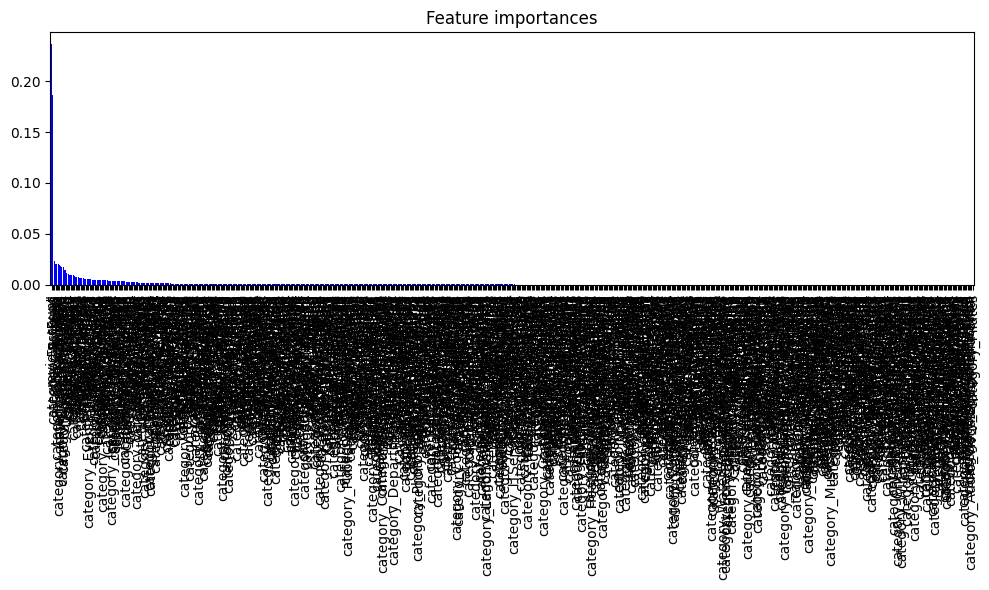

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['stars'].sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)

Correlation with target variable:
stars                                      1.000000
review_count                               0.155087
category_Cafes                             0.125564
category_FoodTrucks                        0.118900
category_Food                              0.117736
category_Vegan                             0.109362
category_SpecialtyFood                     0.100703
category_Desserts                          0.083560
category_Vegetarian                        0.077368
category_Mediterranean                     0.076171
category_JuiceBars_Smoothies               0.071859
category_CocktailBars                      0.068875
category_FoodStands                        0.067572
category_LatinAmerican                     0.067515
category_WineBars                          0.065932
category_Bakeries                          0.065136
category_Gluten_Free                       0.063005
category_Thai                              0.060830
category_MiddleEastern        

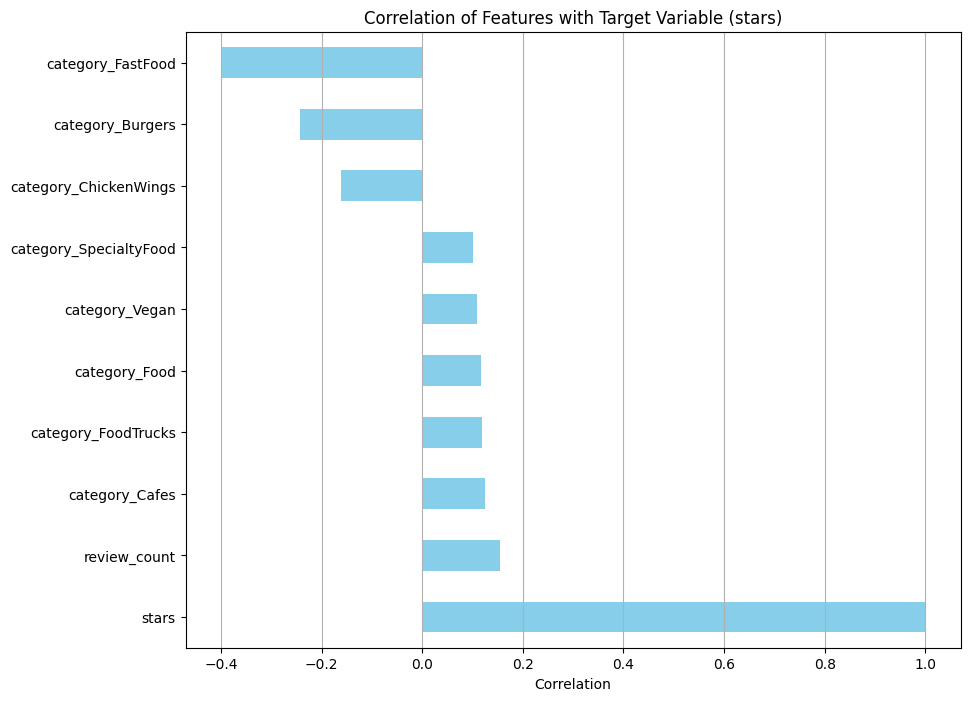

In [ ]:
import matplotlib.pyplot as plt

#Select features with absolute correlation values greater than 0.1
significant_correlation = correlation_with_target[abs(correlation_with_target) > 0.1]

# Plot
plt.figure(figsize=(10, 8))
significant_correlation.plot(kind='barh', color='skyblue')
plt.xlabel('Correlation')
plt.title('Correlation of Features with Target Variable (stars)')
plt.grid(axis='x')
plt.show()